In [73]:
import pandas as pd

# Load the CSV files
file_1_path = '/Users/yuxitian/Desktop/Datathon 03:2024/Dataset/file_3_Mar18_Output_1.csv'
file_2_path = '/Users/yuxitian/Desktop/Datathon 03:2024/Dataset/file_4_Mar18_Output_1.csv'

df1 = pd.read_csv(file_1_path)
df2 = pd.read_csv(file_2_path)

# Display the first few rows of each DataFrame
df1.head(), df2.head()


(      timestamp_call_key retailer_code       serial reason  \
 0  240315173250 DAL1OA3M             D  10010009499     PP   
 1  240315124742 DAL15XHK             E  10006021998     BA   
 2  240317114237 DAL3BLK6             J  10016007830     PT   
 3  240314120849 PHX6PL4U             E  10008003199     BA   
 4  240314145902 DAL68RYS             I  10013002037     BA   
 
                     mos  resolved  no_of_accounts_with_syf_13_march  \
 0              IA PP TR  resolved                               1.0   
 1        IA BA TS nl TR     floor                               2.0   
 2  IA AA BA MR nl PT TR  resolved                              12.0   
 3                 IA BA  resolved                               2.0   
 4     IA BA TS nl mm TR     floor                               6.0   
 
    account_balance_13_march delinquency_history_13_march  \
 0                       NaN                         [00]   
 1                    143.28                         [00]   
 2 

# Combined two dataset into one dataset 

In [74]:
# Concatenate the two DataFrames vertically
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_csv_path = '/Users/yuxitian/Desktop/Datathon 03:2024/Dataset/combined_dataset.csv'
combined_df.to_csv(combined_csv_path, index=False)

# Return the path to the new combined CSV file
combined_csv_path



'/Users/yuxitian/Desktop/Datathon 03:2024/Dataset/combined_dataset.csv'

In [75]:
df3 = pd.read_csv(combined_csv_path)

# Filter reason column I need the 'floor' [df4_floor]

In [76]:
Combined_dataset_floor = '/Users/yuxitian/Desktop/Datathon 03:2024/Dataset/Combined_dataset_floor.csv'
df4_floor = pd.read_csv(Combined_dataset_floor)
df4_floor.head()

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march
0,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/03,...,0,2.0,143.28,[00],9/22/03,NaN,0,1,E,0
1,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/22,...,0,6.0,7.00,[00],1/2/22,NaN,0,1,,0
2,240314151323 PHX4I30S,I,10013002037,PS,IA BA TS nl PS nl mt RS TR,floor,6.0,7.00,[00],1/2/22,...,0,6.0,7.00,[00],1/2/22,NaN,0,1,,0
3,240317234904 DAL5X9Y0,B,10007034394,eL,IA BA TS nl eL TR,floor,2.0,NaN,[00],3/3/24,...,0,2.0,NaN,[00],3/3/24,NaN,0,0,,0
4,240314081235 DAL1ROPP,I,10013000316,BA,IA AA BA MR nl TR,floor,2.0,8.37,[00],2/5/24,...,0,2.0,0.00,[00],2/5/24,F,7,0,,0


# Viz 'Reason' column using bar plot and 
# Count the occurrences of each reason and get the top 10

In [77]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


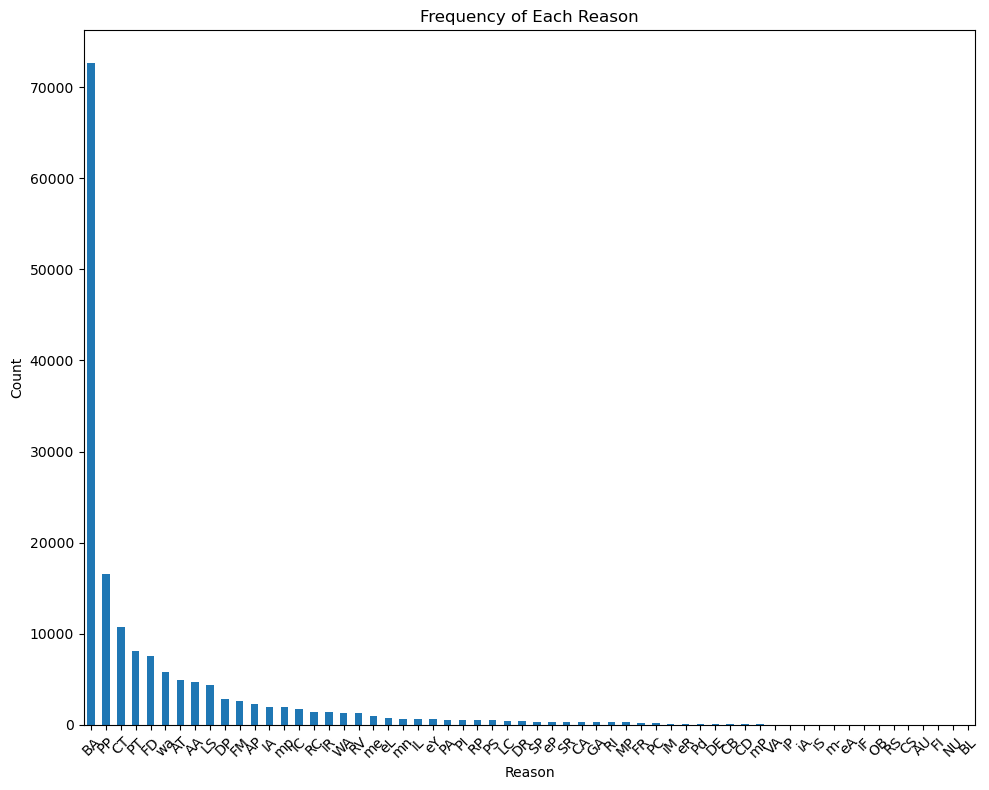

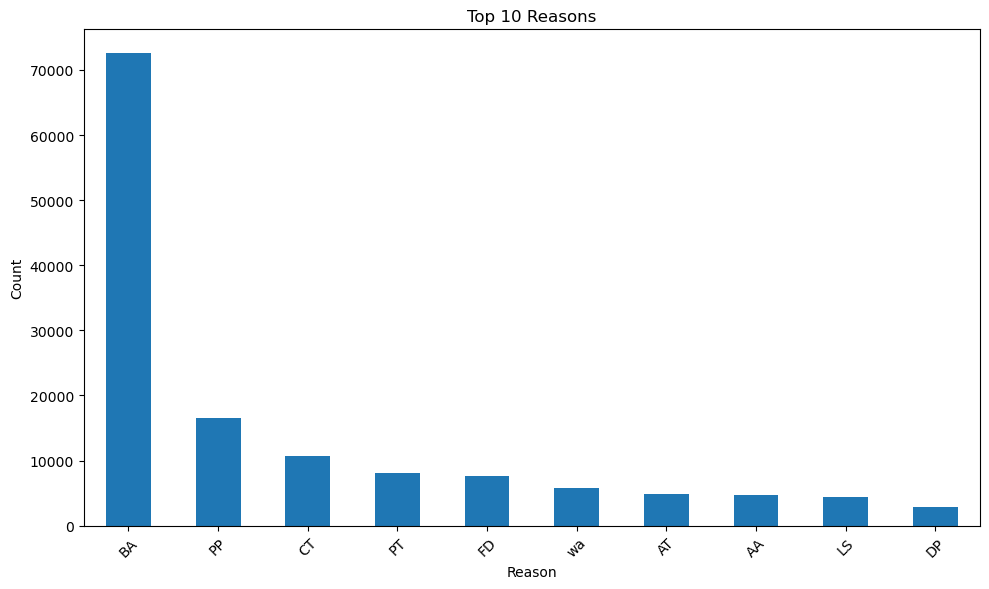

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each reason
reason_counts = df4_floor['reason'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 8))  # You can adjust the size as needed
reason_counts.plot(kind='bar')
plt.title('Frequency of Each Reason')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
plt.tight_layout()  # Adjusts subplot params for the plot to fit into the figure area
plt.show()

# Count the occurrences of each reason and get the top 10
top_reasons = df4_floor['reason'].value_counts().head(10)  # Adjust the number here for more or fewer reasons
# Create a bar plot for the top 10 reasons
plt.figure(figsize=(10, 6))  # You can adjust the size as needed
top_reasons.plot(kind='bar')
plt.title('Top 10 Reasons')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
plt.tight_layout()  # Adjusts subplot params so that the plot fits into the figure area
plt.show()


# Time serise analysis

In [79]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the first 12 digits from 'timestamp_call_key' and convert to datetime
# Assuming the format is YYMMDDHHMMSS
df4_floor['timestamp'] = pd.to_datetime(df4_floor['timestamp_call_key'].str[:12], format='%y%m%d%H%M%S')

# Set 'timestamp' as the index
df.set_index('timestamp', inplace=True)

# Resample the data by a time frequency, e.g., 'D' for day, 'W' for week, 'M' for month
# Here we'll use 'D' for daily counts; change this as needed for your analysis
time_series = df4_floor.resample('D').size()

# Plot the time series
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
time_series.plot()
plt.title('Time Series Analysis')
plt.xlabel('Time')
plt.ylabel('Number of Records')
plt.show()



NameError: name 'df' is not defined

# Use combined dataset, scatteplot

In [81]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import seaborn as sns

# Generate a scatter plot for all pairs of columns
sns.pairplot(combined_df)

# Show the plot
import matplotlib.pyplot as plt
plt.show()


# Resloved or Floor

In [ ]:
# true_resloved 
def map_value(val):
    if val == 'floor':
        return 0
    else:
        return 1

# Create new column based on conditions
combined_dataset['true_resolved'] = combined_dataset['resolved'].apply(map_value)


# Status without BIZ and P4 T1 D3

In [66]:
values_to_exclude = ['B', 'I', 'Z']

c2_dataset = combined_dataset[~combined_dataset['account_status_13_march'].isin(values_to_exclude)]
    

values_to_exclude2 = ['P4', 'TI', 'D3']
c3_dataset = c2_dataset[~c2_dataset['mos'].isin(values_to_exclude2)]



# Last stap for prediction

In [110]:
def get_last_service(s):

    services = [service for service in s.split(' ') if service != 'TR' and service != 'nl' and service != 'ss' and service != 'm-' and service != 'me' and service != 'mm' and service != 'mn' and service != 'mo' and service != "mp" and service != "mt" and service != 'LW' and service != 'NU' and service != 'PX' and service != 'DE' and service != 'iS' and service != 'SP' and service != 'TP' and service and service != 'mP' and service != 'eY' and service != 'iP' and service != 'MP' and service != 'PA' and service != 'PC' and service != 'PS' and service != 'RI' and service != 'VP' and service != 'AT']
    return services[-1] if services else None

# Apply the function to the column and store the result in a new column 'Last service'
c3_dataset['Last service'] = combined_dataset['mos'].apply(get_last_service)

c3_resolved = c3_dataset[c3_dataset['true_resolved'] == 1]
c3_floor = c3_dataset[c3_dataset['true_resolved'] == 0]


c3_resolved

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,true_resolved,Last service
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,NaN,[00],5/19/2013,NaN,0,1,E,0,1,PP
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,0.00,[00],9/4/2017,NaN,8,0,,0,1,PT
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,-6.32,[00],2/7/2024,NaN,0,0,L,0,1,BA
6,240316012428 PHX43JOI,E,10006032399,BA,IA BA,resolved,3.0,NaN,[02],9/26/2021,...,NaN,[02],9/26/2021,NaN,0,0,L,0,1,BA
7,240316171347 PHX4I164,B,10002094529,BA,IA BA,resolved,6.0,0.00,[00],9/13/2020,...,0.00,[00],9/13/2020,NaN,0,0,,0,1,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798790,240314191841 DAL27M1P,i,20012004106,PP,IA PP TR,resolved,4.0,1591.73,[00],9/19/2021,...,1591.73,[00],9/19/2021,NaN,0,0,,0,1,PP
1798791,240314075300 PHX5SRLR,b,20002002187,PP,mn IA PP TR,resolved,9.0,680.86,[00],12/19/2023,...,680.86,[00],12/19/2023,NaN,0,0,NaN,0,1,PP
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,TA
1798794,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,BA


# Run this!!!!

In [272]:
# true_resloved 
def map_value(val):
    if val == 'floor':
        return 0
    else:
        return 1

# Create new column based on conditions
combined_dataset['true_resolved'] = combined_dataset['resolved'].apply(map_value)

values_to_exclude = ['B', 'I', 'Z']

c2_dataset = combined_dataset[~combined_dataset['account_status_13_march'].isin(values_to_exclude)]
    

values_to_exclude2 = ['P4', 'TI', 'D3']
c3_dataset = c2_dataset[~c2_dataset['mos'].isin(values_to_exclude2)]

def get_last_service(s):

    services = [service for service in s.split(' ') if service != 'TR' and service != 'nl' and service != 'ss' and service != 'm-' and service != 'me' and service != 'mm' and service != 'mn' and service != 'mo' and service != "mp" and service != "mt" and service != 'LW' and service != 'NU' and service != 'PX' and service != 'DE' and service != 'iS' and service != 'SP' and service != 'TP' and service and service != 'mP' and service != 'eY' and service != 'iP' and service != 'MP' and service != 'PA' and service != 'PC' and service != 'PS' and service != 'RI' and service != 'VP' and service != 'AT'and service != 'BA'and service != 'Mr'and service != 'MR'and service != 'AT'and service != 'TS'and service != 'PP'and service != 'IA']
    return services[-1] if services else None

# Apply the function to the column and store the result in a new column 'Last service'
c3_dataset['Last service'] = combined_dataset['mos'].apply(get_last_service)

c3_resolved = c3_dataset[c3_dataset['true_resolved'] == 1]
c3_floor = c3_dataset[c3_dataset['true_resolved'] == 0]

c3_dataset

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,true_resolved,Last service
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,NaN,[00],5/19/2013,NaN,0,1,E,0,1,None
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,...,143.28,[00],9/22/2003,NaN,0,1,E,0,0,None
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,0.00,[00],9/4/2017,NaN,8,0,,0,1,PT
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,-6.32,[00],2/7/2024,NaN,0,0,L,0,1,None
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,7.00,[00],1/2/2022,NaN,0,1,,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,TA
1798794,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,None
1798795,240316190932 PHX2S13U,a,20001160188,PP,IA PP TR,resolved,7.0,35.66,[00],8/24/2023,...,35.66,[00],8/24/2023,NaN,0,0,,0,1,None
1798796,240317213341 PHX35A2C,d,20010020211,FD,IA IA TR,floor,8.0,386.63,[00],5/15/2019,...,386.63,[00],5/15/2019,A,0,1,L,0,0,None


In [43]:
c3_floor

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,true_resolved,Last service
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,...,143.28,[00],9/22/2003,NaN,0,1,E,0,0,nl
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,7.00,[00],1/2/2022,NaN,0,1,,0,0,mm
5,240314151323 PHX4I30S,I,10013002037,PS,IA BA TS nl PS nl mt RS TR,floor,6.0,7.00,[00],1/2/2022,...,7.00,[00],1/2/2022,NaN,0,1,,0,0,RS
10,240317234904 DAL5X9Y0,B,10007034394,eL,IA BA TS nl eL TR,floor,2.0,NaN,[00],3/3/2024,...,NaN,[00],3/3/2024,NaN,0,0,,0,0,eL
17,240314081235 DAL1ROPP,I,10013000316,BA,IA AA BA MR nl TR,floor,2.0,8.37,[00],2/5/2024,...,0.00,[00],2/5/2024,F,7,0,,0,0,nl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798781,240315115341 PHX67YL0,e,20005020396,RC,IA PI BA MR nl RC HI TR,floor,4.0,909.39,[00],5/17/2019,...,909.39,[00],5/17/2019,NaN,,0,,0,0,HI
1798785,240314120335 DAL3W50J,a,20001017373,Pd,IA PP BA Pd TR,floor,12.0,3003.14,[00],11/21/2022,...,3003.14,[00],11/21/2022,NaN,0,0,E,0,0,Pd
1798792,240314080117 DAL3CVDQ,b,20002002187,BA,mn IA PP BA MR nl WA nl BA nl mt,floor,9.0,680.86,[00],12/19/2023,...,680.86,[00],12/19/2023,NaN,0,0,NaN,0,0,mt
1798796,240317213341 PHX35A2C,d,20010020211,FD,IA IA TR,floor,8.0,386.63,[00],5/15/2019,...,386.63,[00],5/15/2019,A,0,1,L,0,0,IA


# Total in pie chart

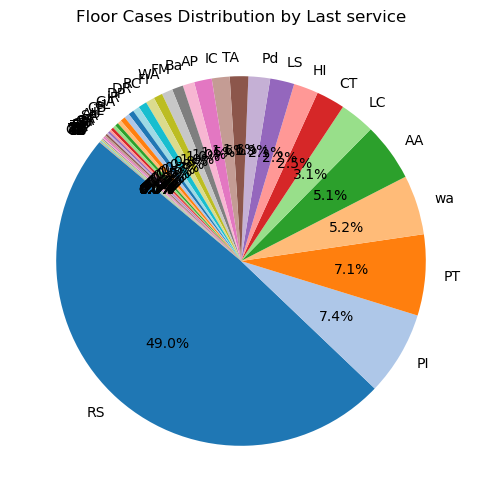

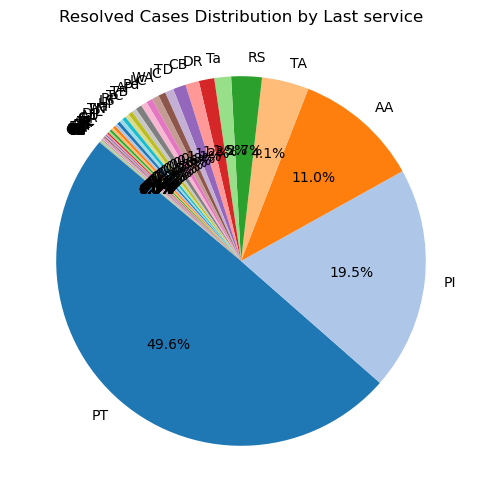

(52,)

In [294]:
import matplotlib.pyplot as plt

# Function to create a pie chart for the given dataset and title
def create_pie_chart(c3_dataset, title):
    # Count the occurrences of unique values in the 'mos' column
    mos_counts = c3_dataset['Last service'].value_counts()
    # Set up the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(mos_counts, labels=mos_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.title(title)
    plt.show()

# Create the pie chart for c3_floor dataset
create_pie_chart(c3_floor, 'Floor Cases Distribution by Last service')

# Create the pie chart for c3_resolved dataset
create_pie_chart(c3_resolved, 'Resolved Cases Distribution by Last service')


# Top 10 in pie chart

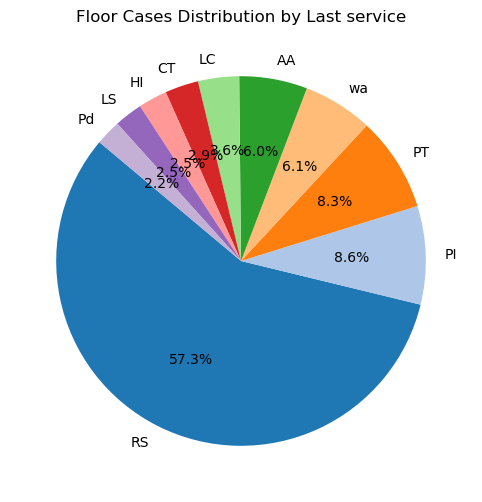

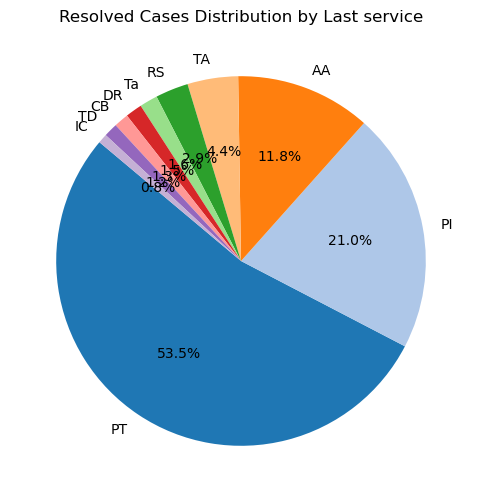

In [227]:
import matplotlib.pyplot as plt

# Function to create a pie chart for the given dataset and title
def create_pie_chart(c3_dataset, title):
    # Count the occurrences of unique values in the 'Last service' column and keep the top 10
    mos_counts = c3_dataset['Last service'].value_counts().head(10)
    # Set up the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(mos_counts, labels=mos_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.title(title)
    plt.show()

# Create the pie chart for the c3_floor dataset, showing only the top 10 'Last service' occurrences
create_pie_chart(c3_floor, 'Floor Cases Distribution by Last service')

# Create the pie chart for the c3_resolved dataset, showing only the top 10 'Last service' occurrences
create_pie_chart(c3_resolved, 'Resolved Cases Distribution by Last service')




# Top 5 and others showing in pie chart

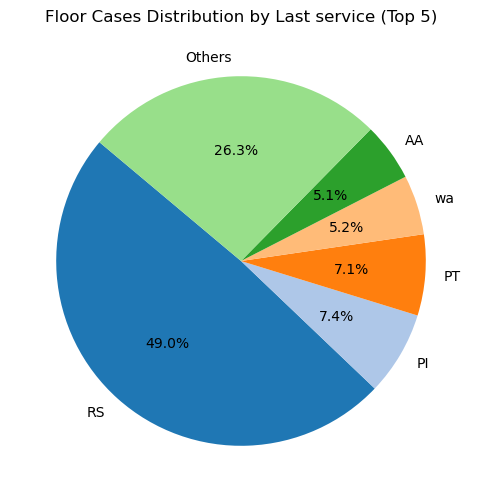

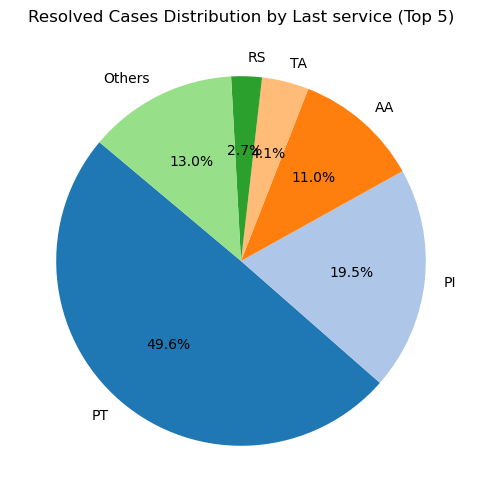

In [229]:
import matplotlib.pyplot as plt

# Function to create a pie chart for the given dataset and title, showing only top 10 occurrences
def create_pie_chart(c3_dataset, title):
    # Count the occurrences of unique values in the 'Last service' column and get top 10
    mos_counts = c3_dataset['Last service'].value_counts().head(5)
    # Add an 'Others' category if there are more than 10 unique values
    if len(c3_dataset['Last service'].value_counts()) > 5:
        others_count = c3_dataset['Last service'].value_counts()[5:].sum()
        mos_counts['Others'] = others_count
    # Set up the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(mos_counts, labels=mos_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.title(title)
    plt.show()

# Create the pie chart for the c3_floor dataset, showing only the top 10 'Last service' values
create_pie_chart(c3_floor, 'Floor Cases Distribution by Last service (Top 5)')

# Create the pie chart for the c3_resolved dataset, showing only the top 10 'Last service' values
create_pie_chart(c3_resolved, 'Resolved Cases Distribution by Last service (Top 5)')


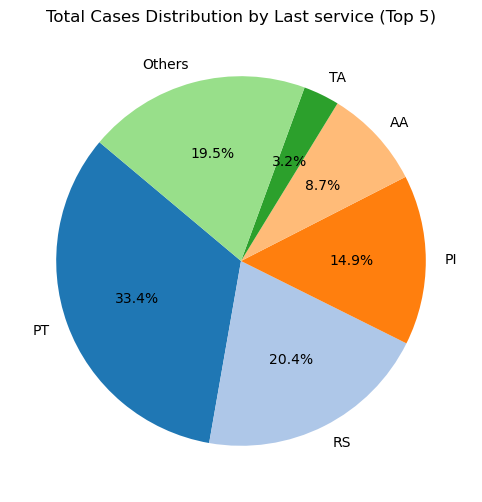

In [231]:
import matplotlib.pyplot as plt

# Function to create a pie chart for the given dataset and title, showing only top 10 occurrences
def create_pie_chart(c3_dataset, title):
    # Count the occurrences of unique values in the 'Last service' column and get top 10
    mos_counts = c3_dataset['Last service'].value_counts().head(5)
    # Add an 'Others' category if there are more than 10 unique values
    if len(c3_dataset['Last service'].value_counts()) > 5:
        others_count = c3_dataset['Last service'].value_counts()[5:].sum()
        mos_counts['Others'] = others_count
    # Set up the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(mos_counts, labels=mos_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.title(title)
    plt.show()

    
# Create the pie chart for the c3_floor dataset, showing only the top 10 'Last service' values
create_pie_chart(c3_dataset, 'Total Cases Distribution by Last service (Top 5)')


# Create a list

In [297]:
# Apply 'get_last_service' to 'mos' column and create 'Last service' column
c3_dataset['Last service'] = c3_dataset['mos'].apply(get_last_service)

# Calculate the occurrences of each service in 'Last service' column in descending order
service_occurrences = c3_dataset['Last service'].value_counts().to_dict()

service_occurrences
c3_dataset['Last service']



0          None
1          None
2            PT
3          None
4          None
           ... 
1798793      TA
1798794    None
1798795    None
1798796    None
1798797      LS
Name: Last service, Length: 1794758, dtype: object

In [313]:
c3_dataset['Last service'].value_counts().shape

(52,)

# Table for occurance frequency for each MOS

In [312]:
def get_last_service(s):
    services = [service for service in s.split(' ') if service not in {'TR', 'nl', 'ss', 'm-', 'me', 'mm', 'mn', 'mo', "mp", "mt", 'LW', 'NU', 'PX', 'DE', 'iS', 'SP', 'TP', 'mP', 'eY', 'iP', 'MP', 'PA', 'PC', 'PS', 'RI', 'VP', 'AT', 'BA', 'Mr', 'MR', 'AT', 'TS', 'PP', 'IA'}]
    return services[-1] if services else None

c3_dataset['Last service'] = c3_dataset['mos'].apply(get_last_service)

# Calculate frequency and percentage
service_counts = c3_dataset['Last service'].value_counts()
service_df = service_counts.reset_index()
service_df.columns = ['Last service', 'Frequency']
service_df['Percentage'] = (service_df['Frequency'] / service_df['Frequency'].sum()) * 100

service_df

,Last service,Frequency,Percentage
0,PT,221920,33.352520
1,RS,135779,20.406326
2,PI,98978,14.875477
3,AA,58091,8.730539
4,TA,20998,3.155805
5,wa,14562,2.188534
6,LC,10388,1.561220
7,DR,7437,1.117712
8,Pd,7120,1.070070
9,CT,7107,1.068116


# Difference for PT

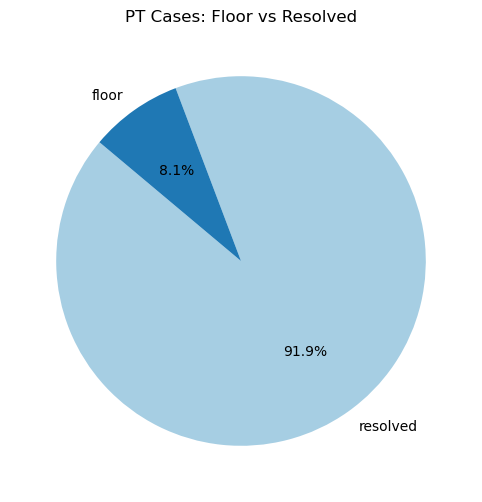

In [288]:
def create_resolved_pie_chart_for_pt(dataset):
    # Filter for 'PT' category
    pt_dataset = c3_dataset[c3_dataset['Last service'] == 'PT']
    
    # Assuming 'resolved' column indicates whether a case is 'floor' or 'resolved'
    resolved_counts = pt_dataset['resolved'].value_counts()
    
    # Generate pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(resolved_counts, labels=resolved_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('PT Cases: Floor vs Resolved')
    plt.show()

# Assuming c3_dataset is your dataset variable
create_resolved_pie_chart_for_pt(c3_dataset)


# Difference for RS

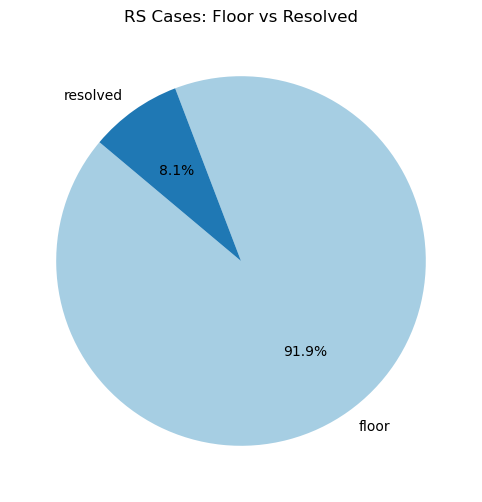

In [289]:
def create_resolved_pie_chart_for_rs(dataset):
    # Filter for 'RS' category
    rs_dataset = c3_dataset[c3_dataset['Last service'] == 'RS']
    
    # Assuming 'resolved' column indicates whether a case is 'floor' or 'resolved'
    resolved_counts = rs_dataset['resolved'].value_counts()
    
    # Generate pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(resolved_counts, labels=resolved_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('RS Cases: Floor vs Resolved')
    plt.show()

# Assuming c3_dataset is your dataset variable
create_resolved_pie_chart_for_rs(c3_dataset)


# compare two columns calculate their prediction rate

In [290]:
import pandas as pd

# Assuming df is your DataFrame
# Compare 'Last service' and 'reason' columns for equality
c3_dataset['Prediction Correct'] = c3_dataset['Last service'] == c3_dataset['reason']

# This will result in a new column with True (prediction correct) or False (prediction incorrect)


In [291]:
# Calculate the accuracy as the mean of the 'Prediction Correct' column
accuracy = c3_dataset['Prediction Correct'].mean()
print(f"Accuracy: {accuracy:.2%}")


Accuracy: 19.72%


# drop na

In [314]:
import pandas as pd

# Assuming c3_dataset is your current DataFrame after all the filtering and transformations
# Make sure 'Last service' and 'reason' columns are properly formatted and the DataFrame is up-to-date

# Initialize a list to keep track of accuracies
accuracies = []

# Get unique services from 'Last service' column
unique_services = c3_dataset['Last service'].dropna().unique()

# Iterate through each service and calculate its accuracy
for service in unique_services:
    # Filter the dataset for rows where 'Last service' is the current service
    filtered_dataset = c3_dataset[c3_dataset['Last service'] == service]
    
    # Calculate the number of times this service matches the 'reason'
    match_count = (filtered_dataset['Last service'] == filtered_dataset['reason']).sum()
    
    # Calculate the total occurrences of this service in the 'Last service' column
    total_count = filtered_dataset.shape[0]
    
    # Calculate accuracy as percentage and add it to the list
    accuracy = (match_count / total_count) * 100 if total_count > 0 else 0  # Avoid division by zero
    accuracies.append({'Service': service, 'Accuracy': accuracy, 'Total Count': total_count})

# Convert accuracies to a DataFrame for better readability
accuracy_df = pd.DataFrame(accuracies)
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)  # Sort by accuracy in descending order
accuracy_df.reset_index(drop=True, inplace=True)
print(accuracy_df)


   Service    Accuracy  Total Count
0       ER  100.000000          107
1       iO  100.000000           18
2       iA  100.000000           80
3       IC   99.633079         7086
4       Pd   99.494382         7120
5       PT   99.484499       221920
6       eP   99.464525          747
7       FM   99.273784         2754
8       RC   99.091322         2201
9       eL   98.766194         1621
10      eR   98.449612          258
11      wa   98.104656        14562
12      AP   97.689930         6147
13      iR   97.549020         1632
14      RP   97.043568         1928
15      LC   96.986908        10388
16      CD   96.875000          480
17      CT   96.679330         7107
18      BL   96.648045          179
19      eB   96.296296           27
20      eA   95.906433          684
21      iM   94.594595          185
22      GA   94.281217         1906
23      LS   94.261455         6831
24      eS   90.000000           10
25      SR   89.429373         1069
26      CA   89.309878      

In [309]:
c3_dataset['Last service'].dropna().unique().shape

(52,)

# not drop na

In [315]:
import pandas as pd

# Assuming c3_dataset is your current DataFrame after all the filtering and transformations
# Make sure 'Last service' and 'reason' columns are properly formatted and the DataFrame is up-to-date

# Initialize a list to keep track of accuracies
accuracies = []

# Get unique services from 'Last service' column, including NaN values
unique_services = c3_dataset['Last service'].unique()  # Removed .dropna()

# Iterate through each service and calculate its accuracy
for service in unique_services:
    # Filter the dataset for rows where 'Last service' is the current service
    filtered_dataset = c3_dataset[c3_dataset['Last service'] == service]
    
    # Calculate the number of times this service matches the 'reason'
    match_count = (filtered_dataset['Last service'] == filtered_dataset['reason']).sum()
    
    # Calculate the total occurrences of this service in the 'Last service' column
    total_count = filtered_dataset.shape[0]
    
    # Calculate accuracy as percentage and add it to the list
    accuracy = (match_count / total_count) * 100 if total_count > 0 else 0  # Avoid division by zero
    accuracies.append({'Service': service if service == service else 'NaN', 'Accuracy': accuracy, 'Total Count': total_count})

# Convert accuracies to a DataFrame for better readability
accuracy_df = pd.DataFrame(accuracies)
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)  # Sort by accuracy in descending order
accuracy_df.reset_index(drop=True, inplace=True)
print(accuracy_df)


   Service    Accuracy  Total Count
0       ER  100.000000          107
1       iA  100.000000           80
2       iO  100.000000           18
3       IC   99.633079         7086
4       Pd   99.494382         7120
5       PT   99.484499       221920
6       eP   99.464525          747
7       FM   99.273784         2754
8       RC   99.091322         2201
9       eL   98.766194         1621
10      eR   98.449612          258
11      wa   98.104656        14562
12      AP   97.689930         6147
13      iR   97.549020         1632
14      RP   97.043568         1928
15      LC   96.986908        10388
16      CD   96.875000          480
17      CT   96.679330         7107
18      BL   96.648045          179
19      eB   96.296296           27
20      eA   95.906433          684
21      iM   94.594595          185
22      GA   94.281217         1906
23      LS   94.261455         6831
24      eS   90.000000           10
25      SR   89.429373         1069
26      CA   89.309878      

In [316]:
c3_dataset['Last service'].unique().shape

(53,)

# Save as accuracy_report.csv file

In [319]:
# Assuming the script has been run successfully and 'accuracy_df' contains the desired data
# Now, let's write this DataFrame to a CSV file

# Define the file path
file_path = '/Users/yuxitian/Desktop/accuracy_report.csv'

# Write to CSV
accuracy_df.to_csv(file_path, index=False)  # We don't include the DataFrame index in the file

# Return the path for download
file_path


'/Users/yuxitian/Desktop/accuracy_report.csv'

# read the .scv file and sort by 'service'

In [325]:
import pandas as pd

# Replace 'your_file_name.csv' with the path to your actual file
file_path = '/Users/yuxitian/Desktop/Datathon 03:2024/accuracy_report.csv'
accuracy_df = pd.read_csv(file_path)
accuracy_df

sorted_table = accuracy_df.sort_values(by='Service')
sorted_table

,Service,Accuracy,Total Count
29,AA,75.633058,58091
12,AP,97.689930,6147
38,AU,0.869025,1611
18,BL,96.648045,179
43,Ba,0.000000,2988
26,CA,89.309878,739
33,CB,59.228363,5754
16,CD,96.875000,480
17,CT,96.679330,7107
34,DP,54.579208,2424


# Drop the last row and save to .csv file

In [326]:
import pandas as pd

# Load the dataset
file_path = '/Users/yuxitian/Desktop/Datathon 03:2024/accuracy_report.csv'
accuracy_df = pd.read_csv(file_path)

# Sort the table by 'Service'
sorted_table = accuracy_df.sort_values(by='Service')

# Drop the last row
final_table = sorted_table[:-1]

# Save the modified DataFrame to a new CSV file
output_file_path = '/Users/yuxitian/Desktop/Datathon 03:2024/modified_accuracy_report.csv'
final_table.to_csv(output_file_path, index=False)


# Run chi-squre test

In [337]:
c3_dataset['account_balance_change'] = c3_dataset['account_balance_18_march'] - c3_dataset['account_balance_13_march']
c3_dataset['no_of_accounts_with_syf_change'] = c3_dataset['no_of_accounts_with_syf_18_march'] - c3_dataset['no_of_accounts_with_syf_13_march']


#Deal with Delinquency_history_change
# Drop rows with NaN values in the original delinquency history columns
c3_dataset = c3_dataset.dropna(subset=['delinquency_history_13_march', 'delinquency_history_18_march'])

def extract_elements(s):
    if s == '[]':
        return [0, 0]
    else:
        elements = s.strip('[]').split(',')
        # Check if there are exactly two elements
        if len(elements) == 2:
            return [int(elements[0]), int(elements[1])]
        else:
            return [0, 0]  # Return [0, 0] if there are not exactly two elements

# Apply the function to extract elements
c3_dataset[['delinquency_history_past_due_13_march', 'delinquency_history_current_due_13_march']] = c3_dataset['delinquency_history_13_march'].apply(lambda x: pd.Series(extract_elements(x)))
c3_dataset[['delinquency_history_past_due_18_march', 'delinquency_history_current_due_18_march']] = c3_dataset['delinquency_history_18_march'].apply(lambda x: pd.Series(extract_elements(x)))

# Calculate the total past due for each date and the change
c3_dataset['total_past_due_13_march'] = c3_dataset['delinquency_history_past_due_13_march'] + c3_dataset['delinquency_history_current_due_13_march']
c3_dataset['total_past_due_18_march'] = c3_dataset['delinquency_history_past_due_18_march'] + c3_dataset['delinquency_history_current_due_18_march']
c3_dataset['delinquency_history_change'] = c3_dataset['total_past_due_18_march'] - c3_dataset['total_past_due_13_march']



import statsmodels.api as sm

# Drop rows with NaN values in relevant columns
cleaned_dataset = c3_dataset.dropna(subset=['account_balance_change', 'no_of_accounts_with_syf_change','delinquency_history_change', 'true_resolved'])
print("Number of rows in cleaned_dataset:", len(cleaned_dataset))

#print("Missing values in relevant columns:")
#print(c3_dataset[['account_balance_change', 'no_of_accounts_with_syf_change', 'delinquency_history_change', 'true_resolved']].isna().sum())


# Prepare the data
X = cleaned_dataset[['account_balance_change', 'no_of_accounts_with_syf_change']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = cleaned_dataset['true_resolved']

#from statsmodels.stats.outliers_influence import variance_inflation_factor

#found multicollinearity: then check which one variable to exclude:
# Calculate VIF for each independent variable
#vif_data = pd.DataFrame()
#vif_data["feature"] = X.columns
#vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print(vif_data)

#print(cleaned_dataset['delinquency_history_change'].unique())
#print(X['delinquency_history_change'].isna().sum())



# Fit the logistic regression model 
model = sm.Logit(y, X).fit()
print(model.summary())

X = cleaned_dataset[['account_balance_change', 'no_of_accounts_with_syf_change']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = cleaned_dataset['true_resolved']

Number of rows in cleaned_dataset: 1677836
Optimization terminated successfully.
         Current function value: 0.494836
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          true_resolved   No. Observations:              1677836
Model:                          Logit   Df Residuals:                  1677833
Method:                           MLE   Df Model:                            2
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                0.003805
Time:                        23:33:24   Log-Likelihood:            -8.3025e+05
converged:                       True   LL-Null:                   -8.3342e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                    

In [339]:
column_name = ['account_open_date', 'account_status', 'card_activation_status', 'eservice_ind', 'ebill_enrolled_status', 'auto_pay_enrolled_status']
for name in column_name:
    a = name + '_13_march'
    b = name + '_18_march'
    c = name + '_changed'
    c3_dataset[c] = c3_dataset[a] == c3_dataset[b]
    
from scipy.stats import chi2_contingency

for name in column_name:
    c = name + '_changed'
    # Drop rows with NaN values in the relevant columns
    cleaned_dataset = c3_dataset.dropna(subset=[c, 'true_resolved'])
    # Create a contingency table
    contingency_table = pd.crosstab(cleaned_dataset[c], cleaned_dataset['true_resolved'])
    # Perform the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-square test for {c}: chi2 = {chi2}, p-value = {p}')

Chi-square test for account_open_date_changed: chi2 = 0.02862835873708981, p-value = 0.8656399835327646
Chi-square test for account_status_changed: chi2 = 9395.349824178262, p-value = 0.0
Chi-square test for card_activation_status_changed: chi2 = 5723.518533354769, p-value = 0.0
Chi-square test for eservice_ind_changed: chi2 = 5035.578245643565, p-value = 0.0
Chi-square test for ebill_enrolled_status_changed: chi2 = 8834.45575092141, p-value = 0.0
Chi-square test for auto_pay_enrolled_status_changed: chi2 = 1012.9745384764705, p-value = 2.7169830778029285e-222
